<a href="https://colab.research.google.com/github/Francisco-Dougllas/1.1_Programacao_Python/blob/main/TESTES_COM_DIFERENCIACAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SERIES TEMPORAIS MODELO FINAL

In [ ]:
# Import Das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import statsmodels.tsa.stattools
import scipy.stats as stats
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [ ]:
# Import da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/Francisco-Dougllas/1.7_Series_Temporais/main/dados_diarios.csv')
print(df.dtypes)

DATA           object
VR_LIQUIDO    float64
dtype: object


In [ ]:
# CONVERTENDO O TIPO DA DATA
df['DATA'] = df['DATA'].astype('datetime64')
df['DATA'] = pd.to_datetime(df['DATA']).dt.normalize()
df.dtypes

DATA          datetime64[ns]
VR_LIQUIDO           float64
dtype: object

In [ ]:
# SELECIONANDO O PERIODO IREMOS COMEÇA COM 500
df = df[['DATA', 'VR_LIQUIDO']].loc[df['DATA'] >= '2020-05-01']
df = df.reset_index(drop=True)
print(df[:5])
len(df)

        DATA  VR_LIQUIDO
0 2020-05-02       35.10
1 2020-05-04     2642.25
2 2020-05-05    22338.34
3 2020-05-06    37642.30
4 2020-05-07    15424.63


670

# **Analise de Series Temporais:** 
## **<font color='blue'>Modelos ARIMA e AUTO_ARIMA, SARIMAX</font>**

In [ ]:
# Criando a Series
serie = pd.Series(df['VR_LIQUIDO'].values, index=df['DATA'].values)
print(type(serie))
print(serie)

<class 'pandas.core.series.Series'>
2020-05-02       35.10
2020-05-04     2642.25
2020-05-05    22338.34
2020-05-06    37642.30
2020-05-07    15424.63
                ...   
2022-06-25    15439.70
2022-06-27    61624.78
2022-06-28    62669.40
2022-06-29    51667.05
2022-06-30    35335.69
Length: 670, dtype: float64


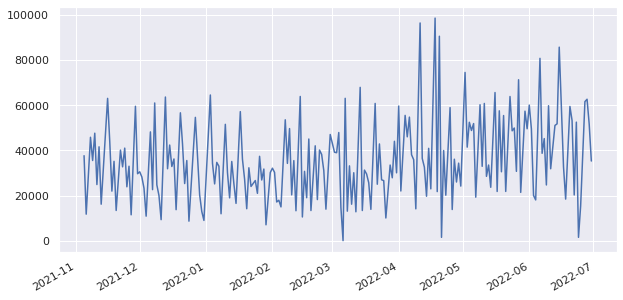

In [ ]:
# Plot exemplo
serie[-200:].plot(figsize=(10, 5));

## **Análise e Preparação da Série**

### **Média Móvel**

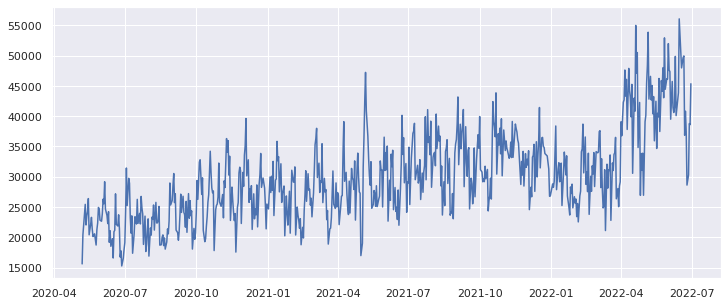

In [ ]:
media_movel = serie.rolling(window=5)
media_movel = media_movel.mean()
plt.figure(figsize=(12, 5))
plt.plot(media_movel);

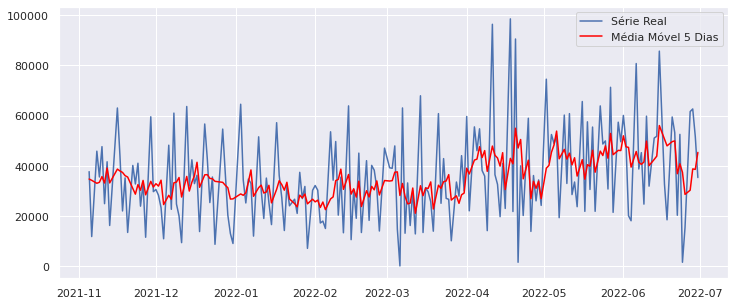

In [ ]:
# Comparando a Serie com A Media, visualizando os ultimos 200 periodos
plt.figure(figsize=(12, 5))
plt.plot(serie[-200:], label='Série Real')
plt.plot(media_movel[-200:] ,color='red', label='Média Móvel 5 Dias')
plt.legend(loc='best');

**Decomposição**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Analisando os ultimos 500 Periodos
decomposicao = seasonal_decompose(serie[-500:], period=7)

<Figure size 864x504 with 0 Axes>

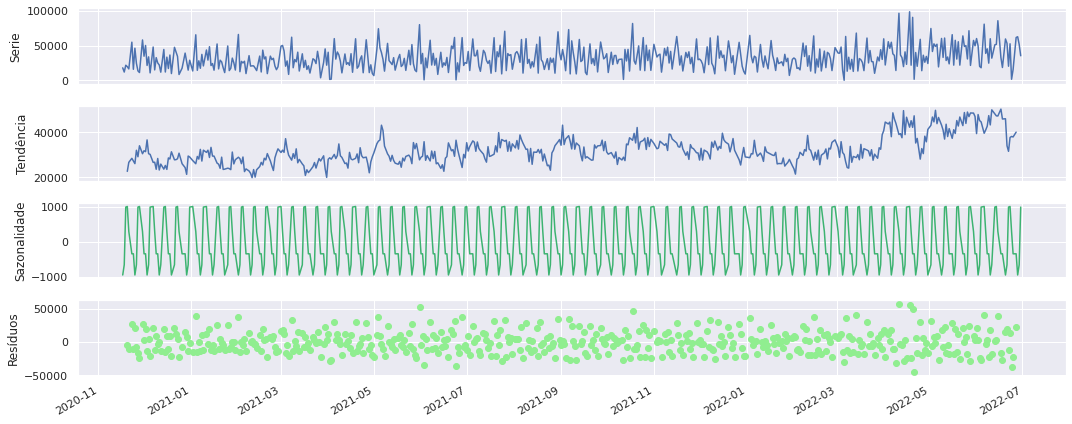

In [ ]:
plt.figure(figsize=(12,7))
fig, axes = plt.subplots(4, 1, sharex=True)
decomposicao.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Serie')
decomposicao.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Tendência')
decomposicao.seasonal.plot(ax=axes[2], legend=False, color='mediumseagreen')
axes[2].set_ylabel('Sazonalidade')
decomposicao.resid.plot(ax=axes[3], legend=False, color='lightgreen', marker='o', linewidth=0)
[axes[3].set_ylabel('Resíduos'), 0]
plt.tight_layout();

### **Normalidade e Transformação**

In [ ]:
import scipy.stats as stats

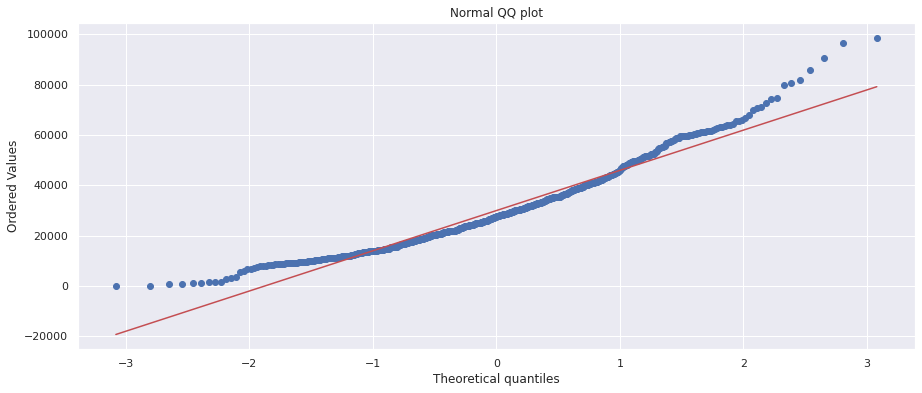

In [ ]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot");

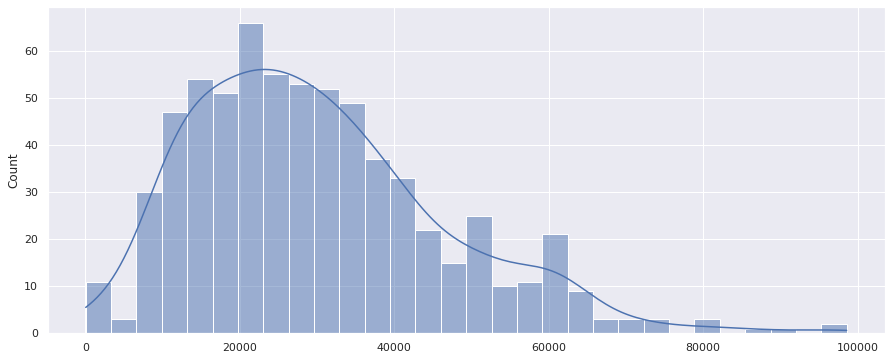

In [ ]:
import seaborn as sns
sns.histplot(serie, kde=True, bins=30);

#### TESTE DE SHAPIRO WILK:
    •	Critérios:
    
    Nível de Significância de 0,05 ou 5% (Mais Utilizado)
    Quando P-valor > 0,05 (Temos uma distribuição normal)
    Quando P-valor < 0,05 (Distribuição Não Normal)

In [ ]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {:.5f}'.format(e))
print('p-valor: {:.5f}'.format(p))

Estatística de teste: 0.95190
p-valor: 0.00000


### **Teste df (Dickey Fuller)**

    Ho = Não e Estacionario: Estatistica do teste > valor critico
    Ha = E Estacionario: Estatistica do Teste < valor critico

In [ ]:
df = statsmodels.tsa.stattools.adfuller(serie)
print(f'Estatistica do teste: {df[0]}')
print(f'P-valor: {df[1]}')
print('Valores criticos: ')
for chave, valor in df[4].items():
    print(f'{chave}: {valor}')

Estatistica do teste: -1.7062592799729273
P-valor: 0.4278904273612607
Valores criticos: 
1%: -3.440434903803665
5%: -2.865989920612213
10%: -2.569139761751388


### **Transformação**

In [ ]:
# Transformação por raiz cubica
serie_3 = (serie) ** (1/3)
serie_3

2020-05-02     3.274179
2020-05-04    13.824772
2020-05-05    28.163306
2020-05-06    33.513932
2020-05-07    24.892676
                ...    
2022-06-25    24.900780
2022-06-27    39.498911
2022-06-28    39.720848
2022-06-29    37.245278
2022-06-30    32.814908
Length: 670, dtype: float64

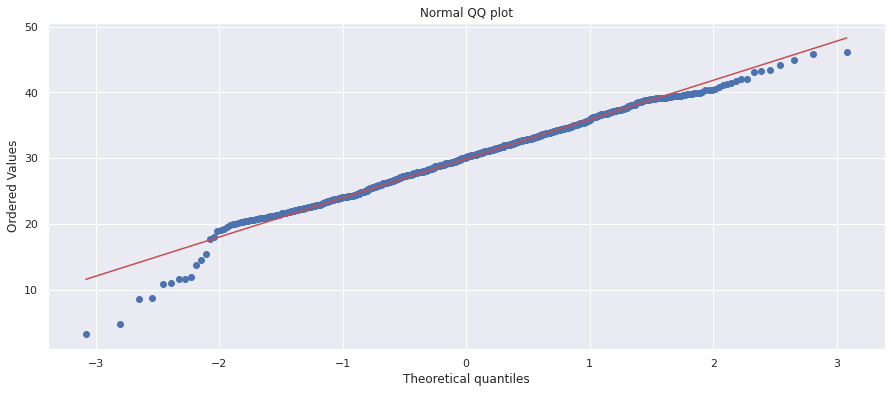

In [ ]:
stats.probplot(serie_3, dist="norm", plot=plt)
plt.title("Normal QQ plot");

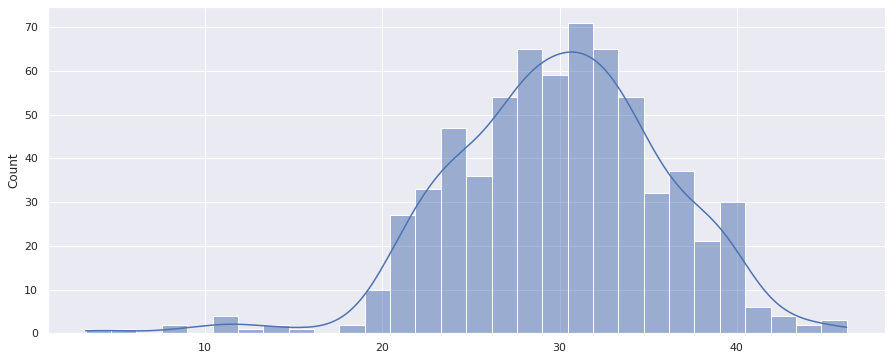

In [ ]:
sns.histplot(serie_3, kde=True, bins=30);

In [ ]:
# TESTE DE SHAPIRO
e, p =stats.shapiro(serie_3)
print('Estatística de teste: {:.5f}'.format(e))
print('p-valor: {:.5f}'.format(p))

Estatística de teste: 0.98322
p-valor: 0.00000


### **Teste df (Dickey Fuller)**

    Ho = Não e Estacionario: Estatistica do teste > valor critico
    Ha = E Estacionario: Estatistica do Teste < valor critico

In [ ]:
import statsmodels.tsa.stattools

In [ ]:
df = statsmodels.tsa.stattools.adfuller(serie)
print(f'Estatistica do teste: {df[0]}')
print(f'P-valor: {df[1]}')
print('Valores criticos: ')
for chave, valor in df[4].items():
    print(f'{chave}: {valor}')

Estatistica do teste: -1.7062592799729273
P-valor: 0.4278904273612607
Valores criticos: 
1%: -3.440434903803665
5%: -2.865989920612213
10%: -2.569139761751388


In [ ]:
df = statsmodels.tsa.stattools.adfuller(serie_3)
print(f'Estatistica do teste: {df[0]}')
print(f'P-valor: {df[1]}')
print('Valores criticos: ')
for chave, valor in df[4].items():
    print(f'{chave}: {valor}')

Estatistica do teste: -2.495736293952495
P-valor: 0.1165151801524516
Valores criticos: 
1%: -3.440419374623044
5%: -2.865983079837035
10%: -2.5691361169972526


### **Estacionaridade**

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho Hipotese Nula = não é estacionário: estatística do teste > valor crítico

Ha Hipotese Alternativa = é estacionário:  estatística do teste < valor crítico

In [ ]:
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 2.3957
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:
kpss = statsmodels.tsa.stattools.kpss(serie_3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 2.3452
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:
# Caso não fosse estacionária poderia tentar fazer a diferenciação:
serie_tf = serie_3.diff()
serie_tf.dropna(axis=0, inplace=True)
serie_tf

2020-05-04    10.550593
2020-05-05    14.338534
2020-05-06     5.350626
2020-05-07    -8.621256
2020-05-08     3.969900
                ...    
2022-06-25    13.263484
2022-06-27    14.598131
2022-06-28     0.221937
2022-06-29    -2.475570
2022-06-30    -4.430370
Length: 669, dtype: float64

### **Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

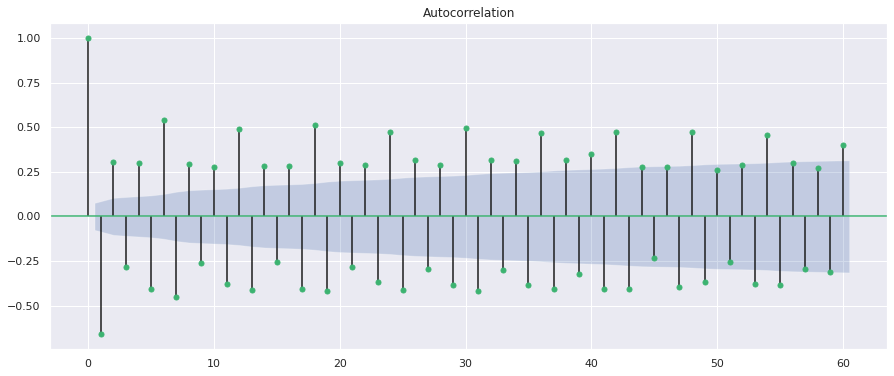

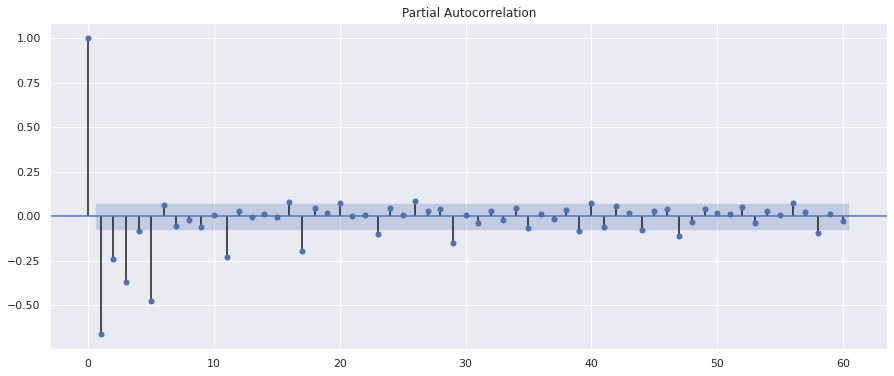

In [ ]:
plot_acf(serie_tf, lags=60, c='mediumseagreen')
plot_pacf(serie_tf, lags=60);

# MODELO ARIMA

Modelo ARIMA: (p, d, q)

In [ ]:
# Import da biblioteca
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Criando o Modelo
modelo_arima = ARIMA(serie_tf, order=(5, 1, 7))

# Treinando e imprimindo o resultado
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  669
Model:                 ARIMA(5, 1, 7)   Log Likelihood               -2012.921
Date:                Wed, 21 Sep 2022   AIC                           4051.841
Time:                        19:26:29   BIC                           4110.397
Sample:                             0   HQIC                          4074.525
                                - 669                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7585      0.046    -38.429      0.000      -1.848      -1.669
ar.L2         -2.4563      0.100    -24.569      0.000      -2.652      -2.260
ar.L3         -2.4075      0.124    -19.343      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


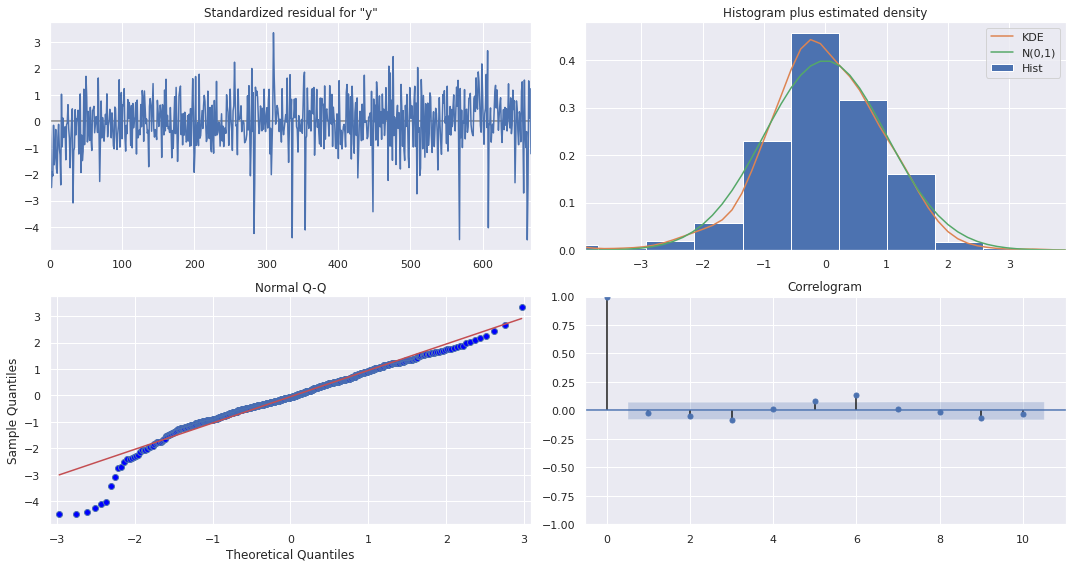

In [ ]:
resultado_arima.plot_diagnostics(figsize=(15,8))
plt.tight_layout();

**Analise dos Residuos**

In [ ]:
residuos_arima = resultado_arima.resid
e, p = stats.shapiro(residuos_arima)
print(f"Estatistica de Teste: {e:.5f}")
print(f"P-valor: {p:.5f}")

Estatistica de Teste: 0.95816
P-valor: 0.00000


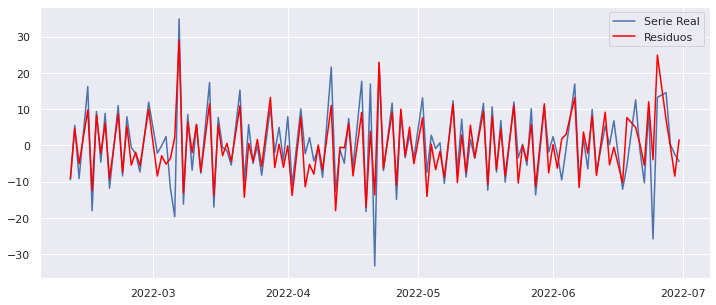

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(serie_tf[-120:], label='Serie Real')
plt.plot(serie_tf[-120:] - residuos_arima[-120:], color='red', label='Residuos')
plt.legend(loc='best');

**Previsao**

In [ ]:
# Resultado do ARIMA
resultado_arima.fittedvalues

2020-05-04     0.000000
2020-05-05    10.549002
2020-05-06    11.662493
2020-05-07    13.095702
2020-05-08    18.358196
                ...    
2022-06-25    24.967982
2022-06-27     7.124687
2022-06-28    -0.339472
2022-06-29    -8.483720
2022-06-30     1.544761
Length: 669, dtype: float64

In [ ]:
# Previsao Para os Proximos 30 dias
previsao_arima = resultado_arima.forecast(30)
previsao_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


669   -1.691683
670    6.406802
671   -3.385213
672    3.919176
673   -7.718478
674    8.566216
675   -5.599882
676    4.471995
677   -5.311059
678    5.323163
679   -5.515306
680    7.660017
681   -7.806382
682    4.765919
683   -3.177303
684    5.587940
685   -7.440485
686    6.844088
687   -6.074830
688    5.920898
689   -4.570862
690    4.185118
691   -6.421026
692    8.322407
693   -6.587046
694    4.357311
695   -4.486878
696    5.716595
697   -6.098752
698    6.850950
Name: predicted_mean, dtype: float64

In [ ]:
indice = pd.date_range('2022-06-30', periods=len(previsao_arima), freq='B')
indice

DatetimeIndex(['2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# Criando uma nova serie e revertendo a transformação por raiz cubica
serie_arima = pd.Series(previsao_arima.values, index=indice )
serie_arima 

2022-06-30   -1.691683
2022-07-01    6.406802
2022-07-04   -3.385213
2022-07-05    3.919176
2022-07-06   -7.718478
2022-07-07    8.566216
2022-07-08   -5.599882
2022-07-11    4.471995
2022-07-12   -5.311059
2022-07-13    5.323163
2022-07-14   -5.515306
2022-07-15    7.660017
2022-07-18   -7.806382
2022-07-19    4.765919
2022-07-20   -3.177303
2022-07-21    5.587940
2022-07-22   -7.440485
2022-07-25    6.844088
2022-07-26   -6.074830
2022-07-27    5.920898
2022-07-28   -4.570862
2022-07-29    4.185118
2022-08-01   -6.421026
2022-08-02    8.322407
2022-08-03   -6.587046
2022-08-04    4.357311
2022-08-05   -4.486878
2022-08-08    5.716595
2022-08-09   -6.098752
2022-08-10    6.850950
Freq: B, dtype: float64

In [ ]:
dados_com_previsao = pd.concat([serie_3, serie_arima])
dados_com_previsao = serie_3.shift(1) + dados_com_previsao

In [ ]:
dados_com_previsao.shift(1)

2020-05-02          NaN
2020-05-04          NaN
2020-05-05    17.098950
2020-05-06    41.988078
2020-05-07    61.677238
                ...    
2022-08-04          NaN
2022-08-05          NaN
2022-08-08          NaN
2022-08-09          NaN
2022-08-10          NaN
Length: 700, dtype: float64

In [ ]:
# Criando uma nova serie e revertendo a transformação por raiz cubica
serie_arima = pd.Series(previsao_arima.values, index=indice )
serie_arima 

2022-06-30   -1.691683
2022-07-01    6.406802
2022-07-04   -3.385213
2022-07-05    3.919176
2022-07-06   -7.718478
2022-07-07    8.566216
2022-07-08   -5.599882
2022-07-11    4.471995
2022-07-12   -5.311059
2022-07-13    5.323163
2022-07-14   -5.515306
2022-07-15    7.660017
2022-07-18   -7.806382
2022-07-19    4.765919
2022-07-20   -3.177303
2022-07-21    5.587940
2022-07-22   -7.440485
2022-07-25    6.844088
2022-07-26   -6.074830
2022-07-27    5.920898
2022-07-28   -4.570862
2022-07-29    4.185118
2022-08-01   -6.421026
2022-08-02    8.322407
2022-08-03   -6.587046
2022-08-04    4.357311
2022-08-05   -4.486878
2022-08-08    5.716595
2022-08-09   -6.098752
2022-08-10    6.850950
Freq: B, dtype: float64

In [ ]:
# Concatenando os dados
arima = pd.concat([serie_3, serie_arima])
#arima = serie_3.shift() + arima
arima = serie_3.shift() + arima

In [ ]:
arima_df = serie_3.shift(1) + arima
arima_df

2020-05-02          NaN
2020-05-04    20.373129
2020-05-05    55.812849
2020-05-06    89.840544
2020-05-07    91.920540
                ...    
2022-08-04          NaN
2022-08-05          NaN
2022-08-08          NaN
2022-08-09          NaN
2022-08-10          NaN
Length: 700, dtype: float64

In [ ]:
arima_df = serie_3.shift() + arima
df_arima = arima_df ** 3
#df_arima = df_arima[-30:]
df_arima

2020-05-02              NaN
2020-05-04      8456.160289
2020-05-05    173861.164285
2020-05-06    725132.074616
2020-05-07    776672.090744
                  ...      
2022-08-04              NaN
2022-08-05              NaN
2022-08-08              NaN
2022-08-09              NaN
2022-08-10              NaN
Length: 700, dtype: float64

In [ ]:


# Concatenando os dados
arima = pd.concat([serie_3, serie1])

# Revertendo a Diferenciação e a Transformação por Raiz Cubica
arima_df = serie_3.shift() + serie_tf
df_arima = arima_df ** 3

# Transformando em DataFrame
prev_escala_arima = pd.DataFrame(df_arima, columns=['Previsao_ARIMA'])
prev_escala_arima = prev_escala_arima[-30:]
prev_escala_arima

NameError: ignored

In [ ]:
arima = pd.concat([serie[-100:], prev_escala_arima[-30:]])
arima.plot()

In [ ]:
# Concatenando os dados
arima = pd.concat([serie[-100:], prev_escala_arima])

# PLot Grafico do Resultado
arima.plot();

# SEPARAÇÃO DOS DADOS PARA O TREINO DO SARIMA E SARIMAX

In [ ]:
#split dos dados para o Modelo ARIMA
#70% Treino, 30% Teste
print(f'Shape da Serie: {serie_tf.shape}')
treino    = int(len(serie_tf) * 0.7)
teste     = int(len(serie_tf) - treino)
treino_df = serie_tf[:treino]
teste_df  = serie_tf[-teste:]

print(f'Dados de Treino: {treino_df.shape}')
print(f'Dados te teste: {teste_df.shape}')

In [ ]:
treino_df[-300:].plot()
teste_df.plot()
plt.legend(['Train', 'Test']);

## **MODELO AUTO-ARIMA**

#### Modelo Auto-Arima, leva em Consideração a Sazonalidade dos dados

Modelo arima:(p,d,q)

Modelo SARIMA: (p,d,q)(P,D,Q)

In [ ]:
# import da biblioteca
from pmdarima.arima import auto_arima

In [ ]:
%%time 

modelo_auto = auto_arima(teste_df, exogenous=treino_df, trace=True, stepwise=False, seasonal=True, max_p=10, max_q=10, 
                         max_P=2, max_Q=2, start_p=1, start_q=1, start_P=0, start_Q=0, m=12, d=1, D=1,suppress_warnings=True)
print('Resultado AIC = ', modelo_auto.aic())
# Trace: apresenta no console a lista dos modelos.
# stepwise: seleção gradual(processo mais rápido, porém menos minucioso).
# m: período sazonal (neste caso Diario).
# Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 4,

In [ ]:
#resultado_auto= modelo_auto.fit(teste_df)
print(modelo_auto.summary())

In [ ]:
modelo_auto.plot_diagnostics(figsize=(15,8))
plt.tight_layout();

### **Análise dos Resíduos**

In [ ]:
residuos_auto = modelo_auto.resid

In [ ]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {:.5f}'.format(e))
print('p-valor: {:.5f}'.format(p))

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(serie_tf[-90:], label='Série Real')
plt.plot(serie_tf[-90:] - residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best');

### **Previsao**

In [ ]:
# Prevendo 30 Valores
previsao_auto = modelo_auto.predict(n_periods=30)

# Criando o indice Data
indice = pd.date_range('2022-07-01', periods=len(previsao_auto), freq='B')

# Criando uma nova serie e revertendo a transformação por raiz cubica
aut_arima = pd.Series(previsao_auto.values ** 3, index=indice )

# Criando o DataFrame
prev_auto_arima = pd.DataFrame(aut_arima, columns=['Previsao_SARIMA'])

# Concatenando os dados
prever_auto_arima = pd.concat([serie[-100:], prev_auto_arima])

In [ ]:
# Plot Grafico
prever_auto_arima.plot();

# SARIMAX

In [ ]:
# Import da Biblioteca
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Parametros SARIMA**

    Best model:  ARIMA(0,1,2)(0,1,1)[12]          
    Total fit time: 124.210 seconds
    Resultado AIC =  1201.9497

In [ ]:
# Treinando o SARIMAX
modelo_sarimax = SARIMAX(teste_df, exogenous=treino_df, order=(0, 1, 2), seasonal_order=(0, 1, 1, 12),
                        enforce_invertibility=False, enforce_stationarity=False)
# Treinando
resultado_sarimax = modelo_sarimax.fit()
# Print do Sumario
print(resultado_sarimax.summary())

In [ ]:
resultado_sarimax.plot_diagnostics(figsize=(15,8))
plt.tight_layout();

### **Análise dos Resíduos**

In [ ]:
residuos_sarimax = resultado_sarimax.resid

In [ ]:
e, p = stats.shapiro(residuos_sarimax)
print('Estatística de teste: {:.5f}'.format(e))
print('p-valor: {:.5f}'.format(p))

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(serie_tf[-100:], label='Série Real')
plt.plot(serie_tf[-100:] - residuos_sarimax,color='red', label='Resíduos SARIMAX')
plt.legend(loc='best');

### **Previsao com SARIMAX**

In [ ]:
# Vamos Prever do Indice para os proximos 30 dias contando a partir do ultimo indice de serie teste_df:
previsao_sarimax = resultado_sarimax.predict(203, end=233)

# Criando o indice Data
indice_sx = pd.date_range('2022-07-01', periods=len(previsao_sarimax), freq='B')

# Criando uma nova serie e revertendo a transformação
serie_sx = pd.Series(previsao_sarimax.values ** 3, index=indice_sx )

# Criando o DataFrame
prev_auto_sarimax = pd.DataFrame(serie_sx, columns=['Previsao_SARIMAX'])

# Concatenando os dados
prever_sarimax = pd.concat([serie[-100:], prev_auto_sarimax])

In [ ]:
prever_sarimax.plot();

# ANALISE DO MELHOR MODELO 

### ARIMA

#### <font color='red'>OBS: Com o Modelo ARIMA utilizamos todos os dados sem considera a Sazonalidade</font>

                 SARIMAX Results                                
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  670
    Model:                 ARIMA(5, 1, 7)   Log Likelihood               -1979.252
    Date:                Wed, 21 Sep 2022   AIC                           3984.504
    Time:                        10:48:16   BIC                           4043.079
    Sample:                             0   HQIC                          4007.194

### SARIMA: Leva em consideração a Sazonalidade

                     SARIMAX Results                                       
    ============================================================================================
    Dep. Variable:                                    y   No. Observations:                  202
    Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -596.975
    Date:                              Wed, 21 Sep 2022   AIC                           1201.950
    Time:                                      11:03:23   BIC                           1214.917
    Sample:                                           0   HQIC                          1207.203

### SARIMAX

                 SARIMAX Results                                       
    ============================================================================================
    Dep. Variable:                                    y   No. Observations:                  202
    Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -545.111
    Date:                              Wed, 21 Sep 2022   AIC                           1098.222
    Time:                                      11:05:05   BIC                           1110.859
    Sample:                                           0   HQIC                          1103.348

# **Análise Final do Projeto**

    ANALISE DO MELHOR MODELO SARIMAX
    COMPARAÇÃO COM PERIODOS ANTERIORES E DESEMPENHO

**Comparação dos ultimos 50 periodos**

In [ ]:
# Nossa Serie Real Com Valores Reais
serie_50 = serie[-50:]
serie_50[:5]

In [ ]:
# Vamos Prever

previsao_sarimax = resultado_sarimax.predict(154, end=203)

indice_sx = pd.date_range('2022-05-03', periods=len(previsao_sarimax), freq='B')
# Criando uma nova serie
serie_sx = pd.Series(previsao_sarimax.values ** 3, index=indice_sx )
serie_sx[:5]

In [ ]:
so = []
comparacoes = pd.DataFrame(so)
comparacoes['Valores_Reais'] = serie_50.values
comparacoes['Modelo_Sarimax'] = serie_sx.values
comparacoes.head()

### AVALIAÇÃO DOS ERROS DO MODELO PARA FINS DE ANALISE DE DESEMPENHO

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae_sarimax = mean_absolute_error(comparacoes['Valores_Reais'], comparacoes['Modelo_Sarimax'])
print('ERRO MÉDIO ABSOLUTO (MAE) SARIMAX: {:.3f}'.format(mae_sarimax))

mse_sarimax = mean_squared_error(comparacoes['Valores_Reais'], comparacoes['Modelo_Sarimax'])
print('ERRO QUADRÁTICO MÉDIO (MSE) SARIMAX: {:.3f}'.format(mse_sarimax))

rmse_sarimax = mean_squared_error(comparacoes['Valores_Reais'], comparacoes['Modelo_Sarimax'], squared=False)
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE) SARIMAX: {:.3f}'.format(rmse_sarimax))

**Comparação de Valores**

In [ ]:
print(f'Modelo SARIMAX: {comparacoes.Modelo_Sarimax.sum():.2F}')
print(f'Valores Reais: {comparacoes.Valores_Reais.sum()}')
print(f"Percentual de Perca: {(100 / comparacoes.Valores_Reais.sum())*(comparacoes.Valores_Reais.sum() - comparacoes.Modelo_Sarimax.sum()):.2f}%  ")

In [ ]:
# Exemplo Grafico
comparacoes.plot(subplots=True, layout=(4, 2), figsize=(12, 15), linewidth = 2.0,
                       cmap = 'jet', sharex=True, title = 'Análise Gráfica Dos Modelos')
plt.tight_layout();

In [ ]:

# Fazendo a previsão para 4 MESES frente
periodo_previsao = 88
previsao_sarimax = resultado_sarimax.forecast(steps=periodo_previsao-1, exog = teste_df)

#previsao_sarimax = resultado_sarimax.predict(139, end=169)
# Criando o indice Data
indice_sx = pd.date_range('2022-07-01', periods=len(previsao_sarimax), freq='B')

# Criando uma nova serie
auto_sarimax = pd.Series(previsao_sarimax.values ** 3, index=indice_sx )

# Criando o DataFrame
prev_auto_sarimax = pd.DataFrame(auto_sarimax)
prev_auto_sarimax.columns=['VR_LIQUIDO']
prev_auto_sarimax.reset_index(inplace=True)
prev_auto_sarimax['DATA'] = prev_auto_sarimax['index']
prev_auto_sarimax = prev_auto_sarimax[['DATA','VR_LIQUIDO']]

In [ ]:
df = pd.read_csv('dados_diarios.csv')
novo_df = df.append(prev_auto_sarimax)
novo_df.reset_index(drop=True)[:5]

In [ ]:
# TRATANDO A DATA DO DF_FINAL
novo_df['DATA']       = pd.to_datetime(novo_df['DATA']).dt.normalize()
novo_df['VR_LIQUIDO'] = novo_df['VR_LIQUIDO'].round(3)
novo_df['ANO_MES']    = novo_df['DATA'].apply(lambda x: str(x)[:7])

In [ ]:
import plotly.express as px
novo_df.set_index("DATA", inplace=True)
dfg = novo_df.resample('M').sum()
dfg.reset_index(inplace=True)
fig = px.line(df[-200:], x='DATA', y='VR_LIQUIDO')
fig.show()

# Grafico Previsao Proximos 4 Meses

In [ ]:
fig = px.bar(dfg[25:], x='DATA', y='VR_LIQUIDO', color='VR_LIQUIDO',
            title='Grafico Com os Proximos 4 Meses de Previsão', height=500,)
fig.show()